In [1]:
import pandas as pd

sales_data = pd.read_csv("Sales Data.csv")
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [2]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Date'] = sales_data['Order Date'].dt.date
sales_data['Time'] = sales_data['Order Date'].dt.time
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Date,Time
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30,00:01:00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29,07:03:00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12,18:21:00
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22,15:13:00
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18,12:38:00


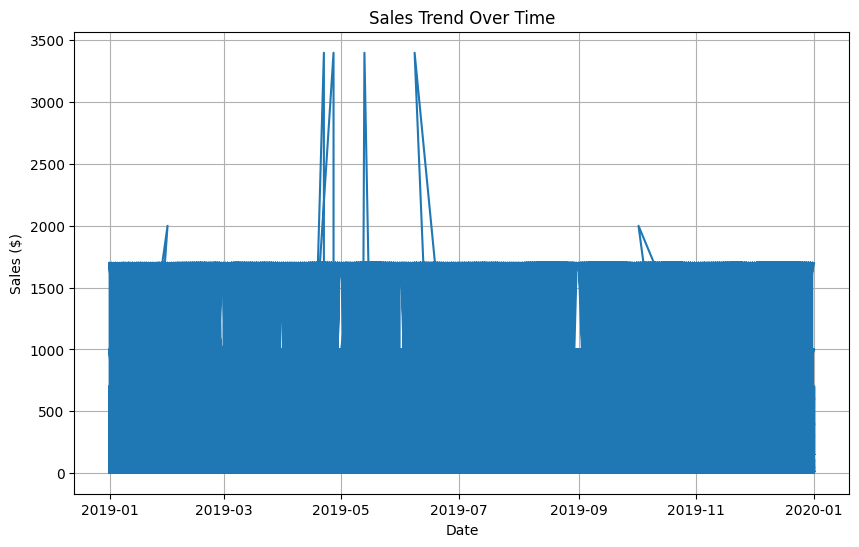

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'], sales_data['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Sales Trend Over Time')
plt.grid(True)
plt.show()

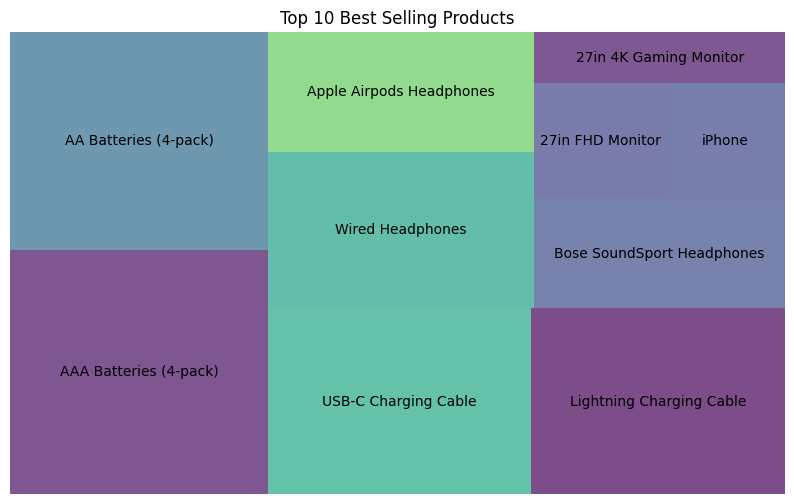

In [6]:
import squarify

product_quantity = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
squarify.plot(sizes=product_quantity.values, label=product_quantity.index, alpha=0.7)
plt.axis('off')
plt.title('Top 10 Best Selling Products')
plt.show()

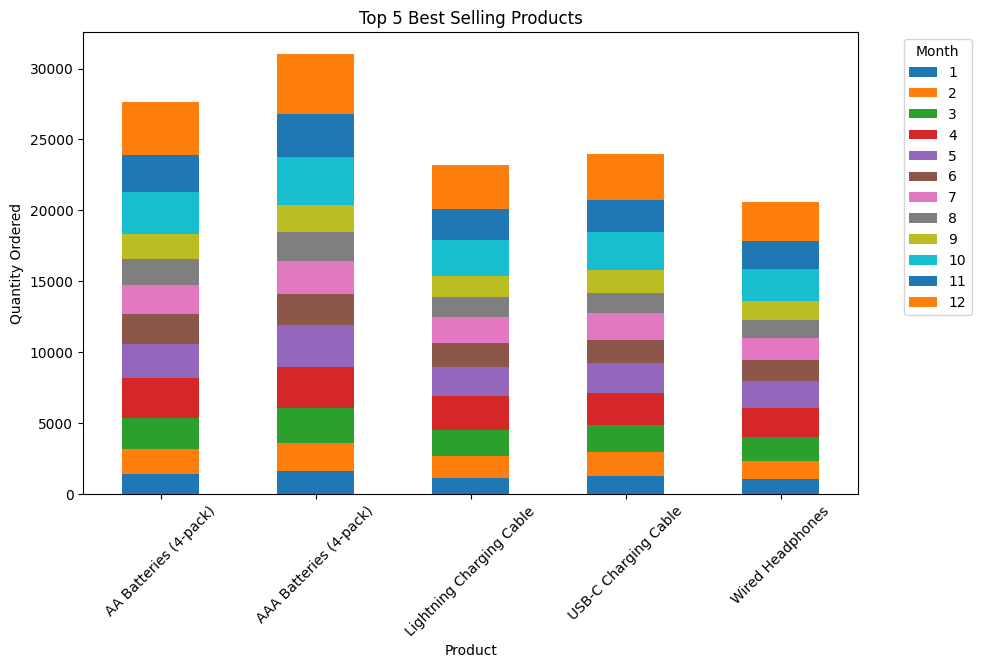

In [8]:
top_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(5)

top_products_monthly = sales_data[sales_data['Product'].isin(top_products.index)].groupby(['Product', 'Month'])['Quantity Ordered'].sum().unstack()

top_products_monthly.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Top 5 Best Selling Products')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

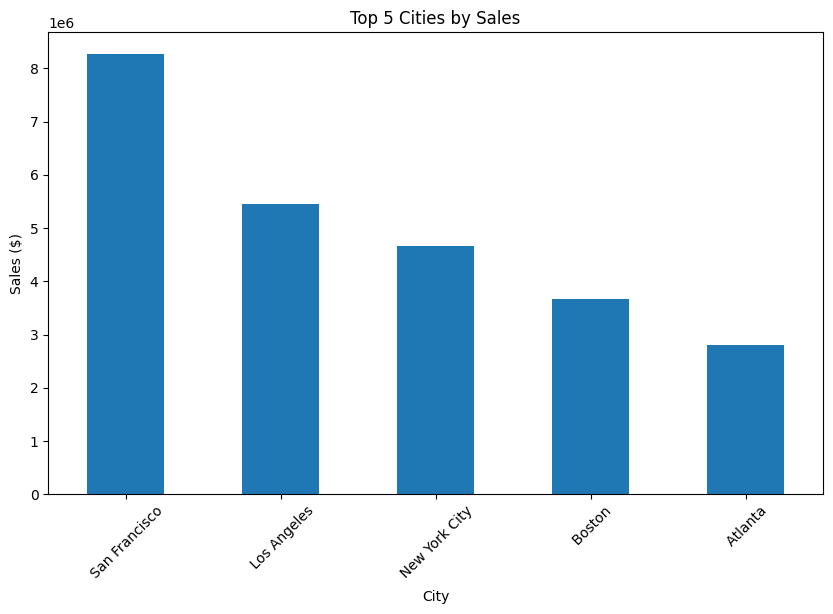

In [9]:
top_cities_sales = sales_data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
top_cities_sales.plot(kind='bar', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()

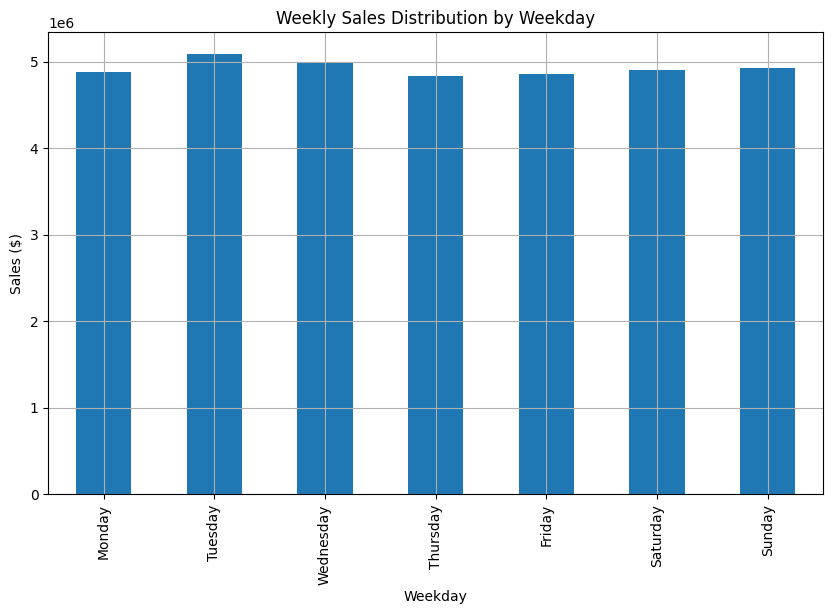

In [13]:
weekly_sales = sales_data.groupby(sales_data['Order Date'].dt.weekday)['Sales'].sum()

plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='bar')
plt.xlabel('Weekday')
plt.ylabel('Sales ($)')
plt.title('Weekly Sales Distribution by Weekday')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()